<a href="https://colab.research.google.com/github/Hazelle27/Algorithm-2/blob/main/Algorithm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

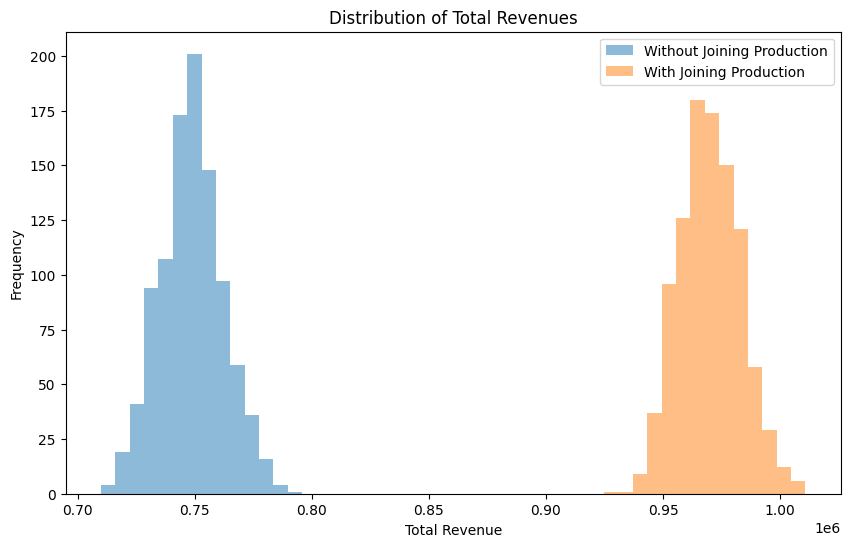

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants remain the same
base_potions = 1
haste_boost = 0.18
milestone_boost = 0.07
lady_luck_chance = 0.12
empower_price_increase = 100
base_potion_price = 1000
days = 100

def simulate_daily_operation(apprentices, days, join_production=False):
    total_revenues = []
    MAX_DAILY_OUTPUT = 1000  # Add a reasonable maximum daily output

    for _ in range(1000):
        total_potions = 0
        current_apprentices = [{'rate': a['rate'], 'potions': a['potions']} for a in apprentices]

        for day in range(days):
            daily_output = 0
            for apprentice in current_apprentices:
                # Cap individual apprentice rate
                apprentice['rate'] = min(apprentice['rate'], 50)  # Cap at 50 potions per day

                apprentice['potions'] += apprentice['rate']
                if apprentice['potions'] >= 10:
                    new_rate = apprentice['rate'] * (1 + milestone_boost)
                    apprentice['rate'] = min(new_rate, 50)  # Apply cap after milestone boost
                    apprentice['potions'] = 0

                current_output = apprentice['rate']
                if np.random.rand() < lady_luck_chance:
                    current_output *= 2  # Double output for lucky strikes

                daily_output += current_output

            if join_production:
                daily_output += 2

            # Cap the daily output
            daily_output = min(daily_output, MAX_DAILY_OUTPUT)
            total_potions += daily_output

        # Calculate revenue with safeguards
        price = base_potion_price + empower_price_increase
        total_revenue = float(total_potions * price)  # Convert to float explicitly

        # Add final safeguard against infinity
        if np.isfinite(total_revenue):
            total_revenues.append(total_revenue)

    # Remove any remaining infinite values
    total_revenues = [r for r in total_revenues if np.isfinite(r)]

    return total_revenues

# Initialize apprentices
apprentices = [{'rate': base_potions * (1 + haste_boost), 'potions': 0} for _ in range(3)]

# Run simulations
revenues_without_join = simulate_daily_operation(apprentices, days)
revenues_with_join = simulate_daily_operation(apprentices, days, join_production=True)

# Plot with additional safeguards
plt.figure(figsize=(10, 6))
if revenues_without_join and revenues_with_join:  # Check if we have valid data
    bins = np.linspace(min(min(revenues_without_join), min(revenues_with_join)),
                      max(max(revenues_without_join), max(revenues_with_join)),
                      50)
    plt.hist(revenues_without_join, bins=bins, alpha=0.5, label='Without Joining Production')
    plt.hist(revenues_with_join, bins=bins, alpha=0.5, label='With Joining Production')
    plt.xlabel('Total Revenue')
    plt.ylabel('Frequency')
    plt.title('Distribution of Total Revenues')
    plt.legend()
    plt.show()